<a href="https://colab.research.google.com/github/thatGreatSloth/Data-Eng-Beginner/blob/main/Netflix_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [11]:
df = pd.read_csv("vgsales.csv") # this just reads and returns as pandas dataframe
df # this outputs



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
df.shape

(16598, 11)

In [13]:
df.describe() # returning basic info about each column. Finds total no.of records in each column

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
df.values  # returns an array of all data indexed

array([[1, 'Wii Sports', 'Wii', ..., 3.77, 8.46, 82.74],
       [2, 'Super Mario Bros.', 'NES', ..., 6.81, 0.77, 40.24],
       [3, 'Mario Kart Wii', 'Wii', ..., 3.79, 3.31, 35.82],
       ...,
       [16598, 'SCORE International Baja 1000: The Official Game', 'PS2',
        ..., 0.0, 0.0, 0.01],
       [16599, 'Know How 2', 'DS', ..., 0.0, 0.0, 0.01],
       [16600, 'Spirits & Spells', 'GBA', ..., 0.0, 0.0, 0.01]],
      dtype=object)

Read Movies Data

In [16]:
df = pd.read_csv("movies.csv")
df

,age,gender,genre
0,20,1,Action
1,23,1,Action
2,25,1,Action
3,26,1,Sci-Fi
4,29,1,Sci-Fi
5,30,1,Sci-Fi
6,31,1,Drama
7,33,1,Drama
8,37,1,Drama
9,20,0,Comedy


Prepare and clean the data
1. split data into input and output set

In [17]:
X = df.drop(columns=['genre']) # creates new dataset without genre
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


Create output set

In [19]:
y = df['genre']
y

,genre
0,Action
1,Action
2,Action
3,Sci-Fi
4,Sci-Fi
5,Sci-Fi
6,Drama
7,Drama
8,Drama
9,Comedy


Create a model using an alogorithm

In [22]:
model = DecisionTreeClassifier()

Train model

In [24]:
model.fit(X.values, y.values) # values property provides data in a 2d view.

DecisionTreeClassifier()

Ask model to make prediction

In [25]:
pred = model.predict([[21,1], [23,0]])
pred

array(['Action', 'Comedy'], dtype=object)

Evaluate accuracy - split data for training and testing

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # 20% for testing, 80% test gave 0.13 accuracy

In [52]:
model.fit(x_train.values, y_train.values)
pred = model.predict(x_test.values) # feed x test values, to find y
pred


array(['Comedy', 'Sci-Fi', 'Comedy', 'Drama'], dtype=object)

In [54]:
score = accuracy_score(y_test, pred)
score

0.5

Models should be persistent since they cannot be trained all the time

In [56]:
import joblib #has methods for saving and loading models

In [58]:
joblib.dump(model, 'movie-recommender.joblib') # binary file that stores models

['movie-recommender.joblib']

In [62]:
model = joblib.load('movie-recommender.joblib')

In [63]:
pred = model.predict([[29,0]])
pred

array(['Documentary'], dtype=object)

from sklearn import tree - export decision tree in graphical format

In [64]:
from sklearn import tree

In [66]:
tree.export_graphviz(model,out_file='movies-recommender.dot',
                    feature_names=['age', 'gender'],
                    class_names= sorted(y.unique()),
                    label='all',
                    rounded=True,
                    filled=True
 )

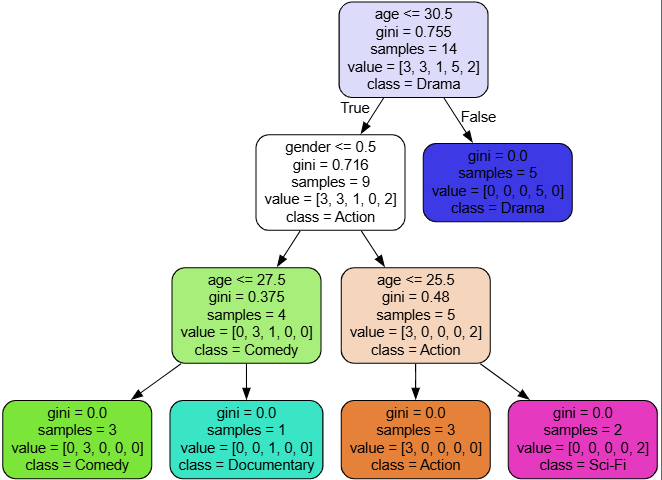